In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

# Latex style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


### Task 1 - Energy vs. Lattice Volume

The lattice parameter value generating the minimum energy is 3.979 Å


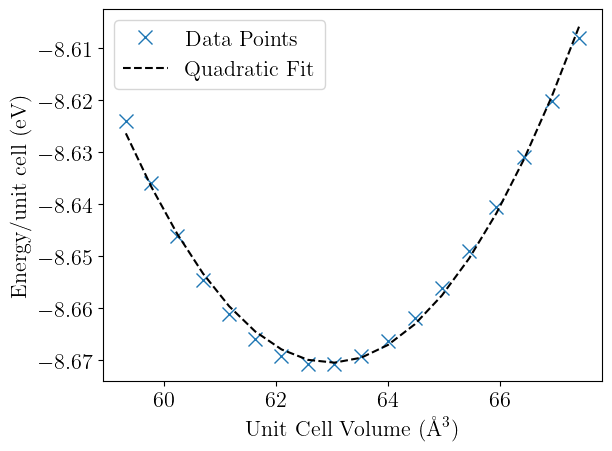

In [3]:
data = np.loadtxt('data/task_1/energies.csv', delimiter=',')
plt.plot(np.pow(data[:, 0], 3), data[:, 1] / 64, 'x', ms=10, label='Data Points')

fit = np.polyfit(np.pow(data[:, 0], 3), data[:, 1] / 64, 2)
plt.plot(np.pow(data[:, 0], 3), np.polyval(fit, np.pow(data[:, 0], 3)), 'k--', label='Quadratic Fit')

print(f'The lattice parameter value generating the minimum energy is {np.power(-fit[1] / (2 * fit[0]), 1/3):.3f} Å')

plt.xlabel('Unit Cell Volume (Å$^3$)')
plt.ylabel('Energy/unit cell (eV)')

plt.legend()
plt.tight_layout()
plt.show()

### Task 2 - Energy Conservation and Temperature

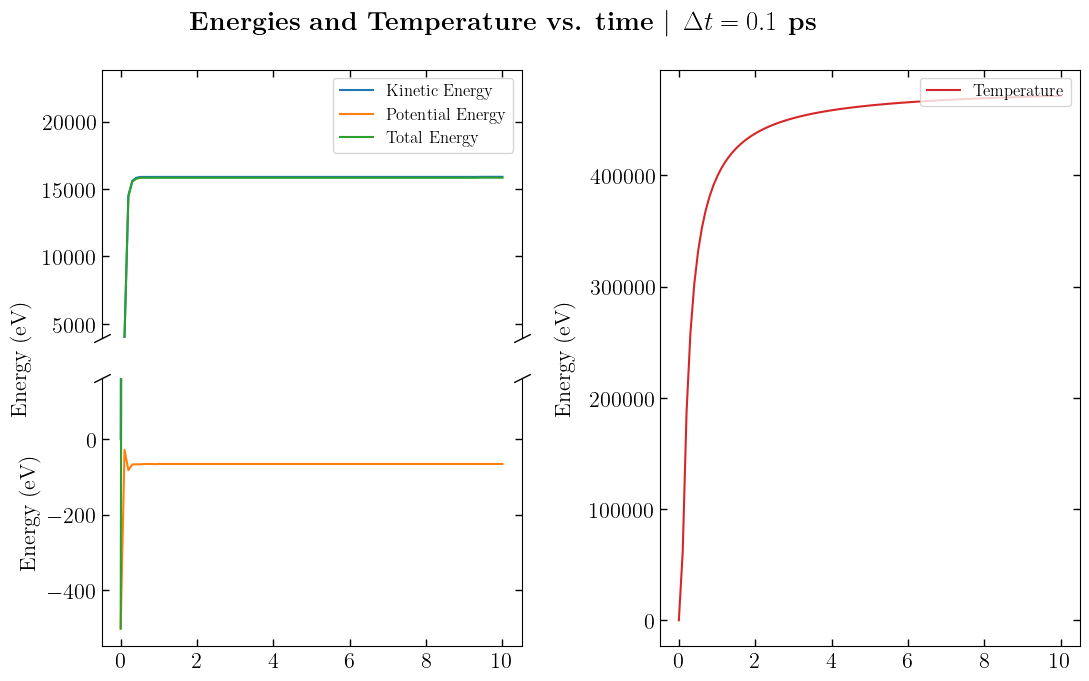

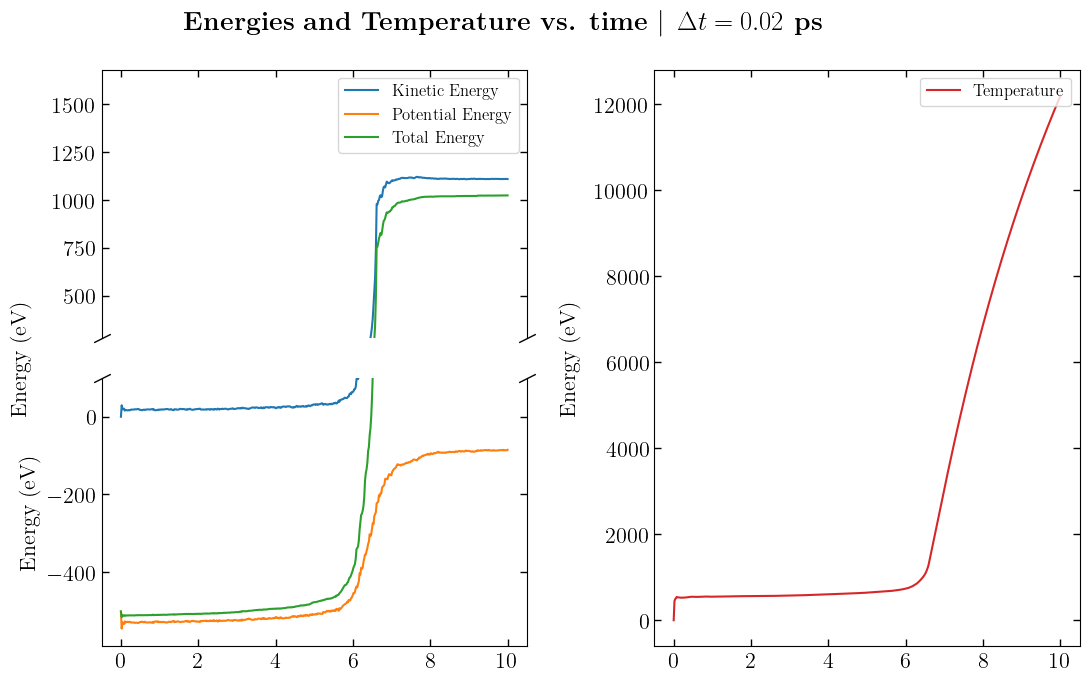

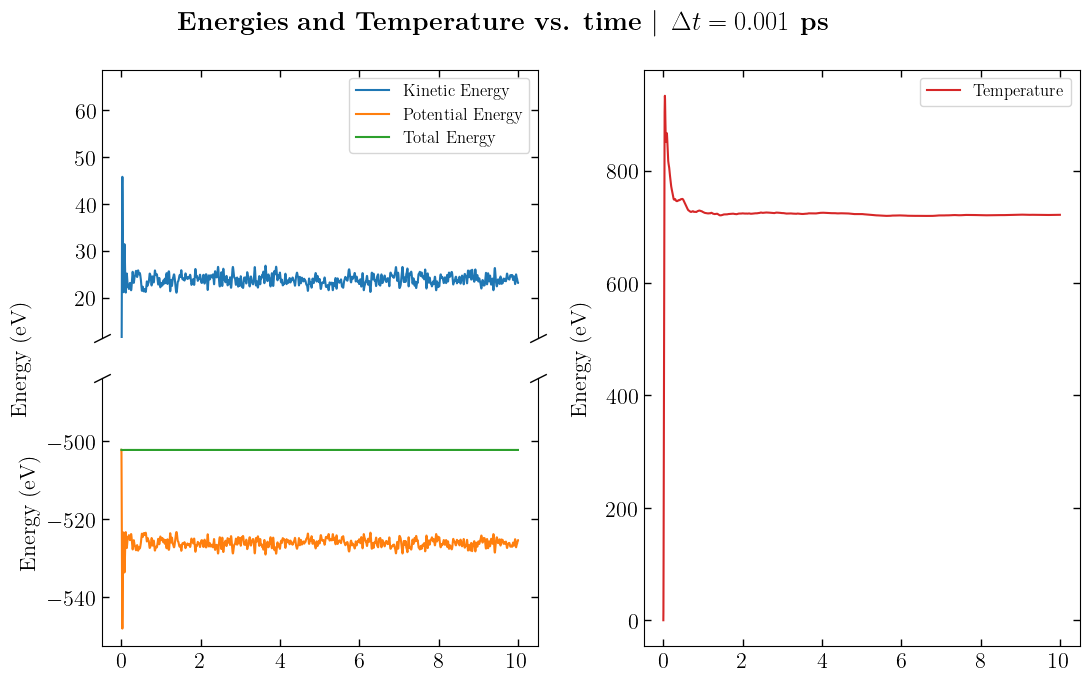

In [4]:
def read_data_task_2(delta_t, its):
    filename = f'data/task_2/data_dt_{delta_t:.3f}_{its:.0f}.csv'
    data = np.loadtxt(filename, delimiter=',')
    its, t_max, delta_t = data[0,0], data[0,1], data[0,2]

    return data, its, t_max, delta_t

def init_fig_task_2(delta_t):
    fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    fig.subplots_adjust(hspace=0.05)  # adjust space between Axes
    ax1, ax2, ax3, ax4 = axs[0][0], axs[1][0], axs[0][1], axs[1][1]
    ax3.set_visible(False)
    ax4.set_visible(False)

    ax1_2 = fig.add_subplot(1, 2, 1, frameon=False)
    ax1_2.set_ylabel('Energy (eV)', labelpad=50)
    ax1_2.set_xticks([])
    ax1_2.set_yticks([])

    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_ylabel('Temperature (K)', labelpad=10)
    plt.suptitle(f'\\textbf{{Energies and Temperature vs. time $\\vert \\hspace{{0.3cm}}\\Delta t = {delta_t}$ ps}}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    #ax1.xaxis.tick_top()
    #ax1.tick_params(labeltop=False)  # don't put tick labels at the top

    return fig, ax1, ax2, ax3, ax4

def plot_data_task_2(data, its, t_max, delta_t):
    t = np.linspace(0, t_max, int(its))
    E_k_min, E_k_max = np.min(data[1:, 0]), np.max(data[1:, 0])
    E_p_min, E_p_max = np.min(data[1:, 1]), np.max(data[1:, 1])

    fig, ax1, ax2, ax3, ax4 = init_fig_task_2(delta_t)
    ax1.plot(t, data[1:, 0], label='Kinetic Energy')
    ax1.plot(t, data[1:, 1], label='Potential Energy')
    ax1.plot(t, data[1:, 2], label='Total Energy')
    ax2.plot(t, data[1:, 0], label='Kinetic Energy')
    ax2.plot(t, data[1:, 1], label='Potential Energy')
    ax2.plot(t, data[1:, 2], label='Total Energy')
    ax1.set_ylim(E_k_max - 0.75 * (E_k_max - E_k_min), E_k_max + 0.5 * (E_k_max - E_k_min))
    ax2.set_ylim(E_p_min - 0.1 * (E_p_max - E_p_min), E_p_max + 0.4 * (E_p_max - E_p_min))

    ax3.plot(t, data[1:, 3], label='Temperature', color='tab:red')

    for ax in (ax1, ax2, ax3):
        if ax == ax2 or ax == ax3:
            ax.set_ylabel('Energy (eV)')
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis='both', direction='in', length=5, width=1, colors='black')
        ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1, colors='black')

    ax1.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax1.legend(fontsize=12, loc='upper right')
    ax3.legend(fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()

t_max = 10
data_01, its_01, t_max_01, delta_t_01 = read_data_task_2(0.1, t_max/0.1)
data_005, its_005, t_max_005, delta_t_005 = read_data_task_2(0.02, t_max/0.02)
data_0001, its_0001, t_max_0001, delta_t_0001 = read_data_task_2(0.001, t_max/0.001)

plot_data_task_2(data_01, its_01, t_max_01, delta_t_01)
plot_data_task_2(data_005, its_005, t_max_005, delta_t_005)
plot_data_task_2(data_0001, its_0001, t_max_0001, delta_t_0001)

### Task 3 - Pressure and Temperature

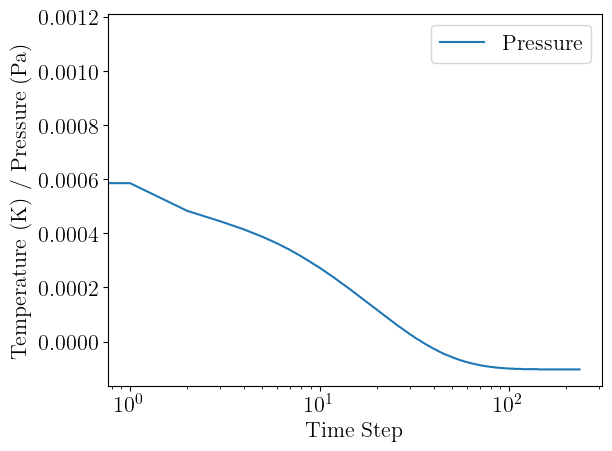

In [14]:
data = np.loadtxt('data/task_3/data_dt_0.001_5000.csv', delimiter=',')

# plt.plot(data[:, 0], label='Temperature')
plt.plot(data[:, 1], label='Pressure')

plt.xlabel('Time Step')
plt.ylabel('Temperature (K) / Pressure (Pa)')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()